In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as mse

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/real-estate-price-prediction/Real estate.csv


# Load data 
Melakukan load data yang akan kita proses. Pada program ini, kita akan mengolah data dari 'real-estate-prediction'.

Hal yang pertama kita lakukan setelah mengimport library/module adalah melakukan load dataset kedalam program. Disini kita menggunakan library/module Python yaitu 'pandas'.

'Pandas' sendiri berguna untuk melakukan analisis maupun manipulasi dari suatu dataset.

In [3]:
df = pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Melihat jumlah data 
df.shape

(414, 8)

In [5]:
# Mengecek data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# Pre-processing
Kita akan melakukan pre-processing terhadap data guna menghilangkan data-data yang tidak diperlukan/tidak valid pada model yang akan dibuat.

In [6]:
# Mengubah tipe data pada kolom 'X2 transaction date'
df['X1 transaction date'] = df['X1 transaction date'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    int64  
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [8]:
# Mengubah nama kolom agar lebih mudah dalam melakukan pelatihan model
# menggunakan 'set_axis()'
df = df.set_axis(['No', 'transaction_date', 'house_age', 'dist_to_MRT', 'conv_store', 'lat', 'long', 'house_price'], axis=1)

In [9]:
df.set_index('No')

,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013,18.8,390.96960,7,24.97923,121.53986,40.6


In [10]:
# Melihat data unique pada setiap kolom dataset
df.nunique()

No                  414
transaction_date      2
house_age           236
dist_to_MRT         259
conv_store           11
lat                 234
long                232
house_price         270
dtype: int64

In [11]:
# Menghapus data duplikasi yang ada didalam dataset
duplicated_ = df.duplicated()
duplicated_.any()

False

# Boxplot
Menampilkan boxplot guna untuk melihat apakah data sebelumnya memiliki outliers atau tidak. Bila data terdapat outliers, maka kita harus menghapus outliers tersebut agar model memiliki tingkat akurasi yang optimal.

<Axes: >

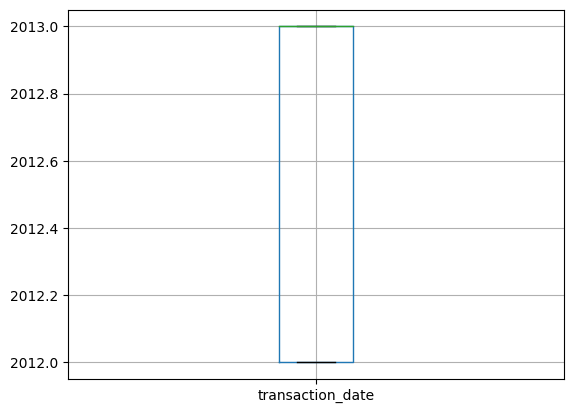

In [12]:
df.boxplot(column=['transaction_date'])

<Axes: >

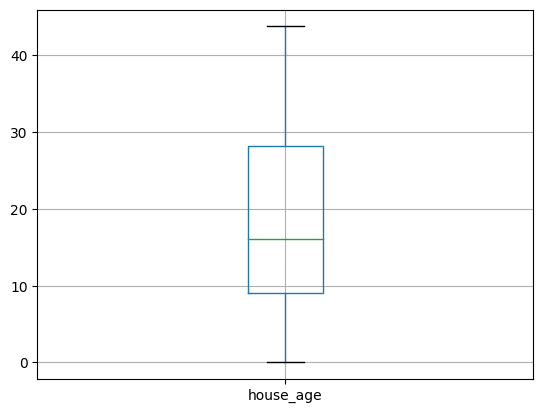

In [13]:
df.boxplot(column=['house_age'])

<Axes: >

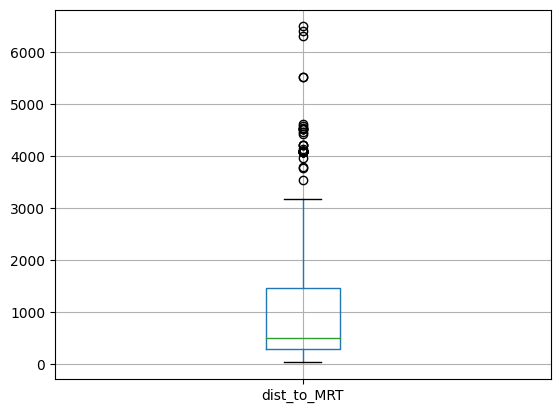

In [14]:
df.boxplot(column=['dist_to_MRT'])

<Axes: >

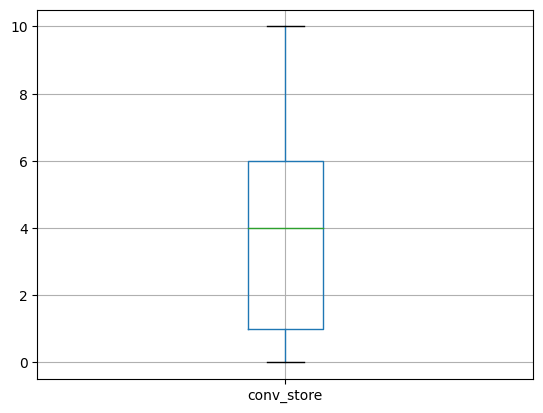

In [15]:
df.boxplot(column=['conv_store'])

<Axes: >

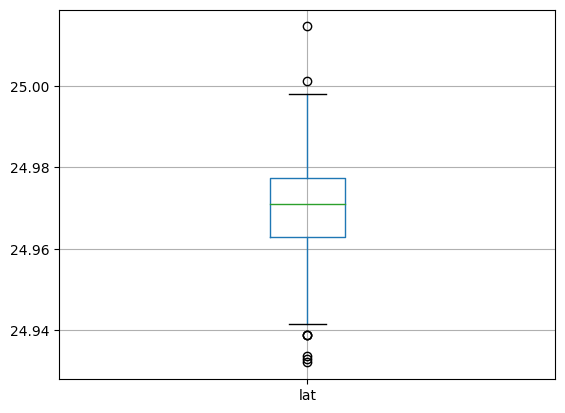

In [16]:
df.boxplot(column=['lat'])

<Axes: >

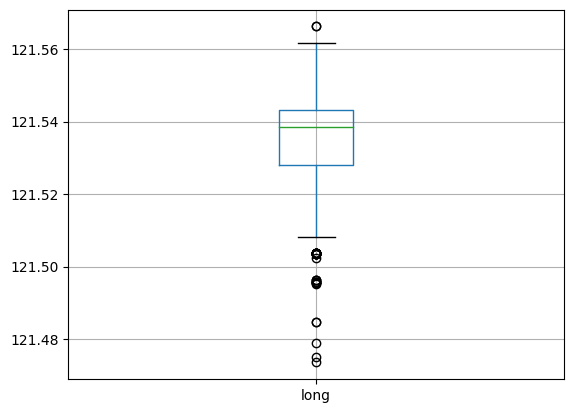

In [17]:
df.boxplot(column=['long'])

<Axes: >

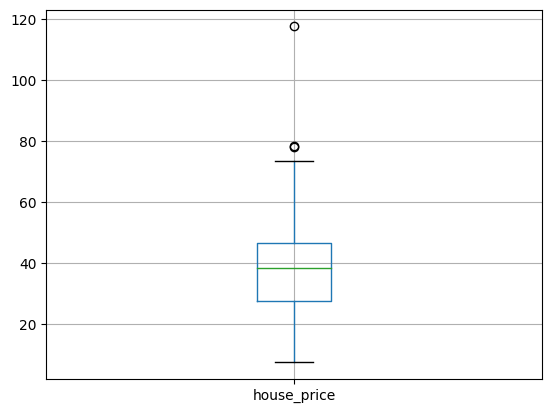

In [18]:
df.boxplot(column=['house_price'])

# Menghapus outliers
Dari visualisasi data menggunakan boxplot, terlihat pada kolom 'dist_to_MRT', 'lat', 'long', dan 'house_price' memiliki outliers.

Kita dapat menggunaka metode IQR (InterQuantile Range). Metode IQR adalah ukuran variabilitas yang didasarkan pada pembagian kumpulan data menjadi kuartil.

> **F(x) : Q3 - Q1****

In [19]:
# dist_to_MRT
Q1 = df.dist_to_MRT.quantile(0.25)
Q3 = df.dist_to_MRT.quantile(0.75)
IQR = Q3 - Q1
df_dist_to_MRT_outliers = df[~((df.dist_to_MRT < (Q1 - 1.5 * IQR)) | (df.dist_to_MRT > (Q3 + 1.5 * IQR)))]
df_dist_to_MRT_outliers.shape

(377, 8)

In [20]:
# lat
Q1 = df_dist_to_MRT_outliers.lat.quantile(0.25)
Q3 = df_dist_to_MRT_outliers.lat.quantile(0.75)
IQR = Q3 - Q1
df_lat_outliers = df_dist_to_MRT_outliers[~((df_dist_to_MRT_outliers.lat < (Q1 - 1.5 * IQR)) | (df_dist_to_MRT_outliers.lat > (Q3 + 1.5 * IQR)))]
df_lat_outliers.shape

(376, 8)

In [21]:
# long 
Q1 = df_lat_outliers.long.quantile(0.25)
Q3 = df_lat_outliers.long.quantile(0.75)
IQR = Q3 - Q1
df_long_outliers = df_lat_outliers[~((df_lat_outliers.long < (Q1 - 1.5 * IQR)) | (df_lat_outliers.long > (Q3 + 1.5 * IQR)))]
df_long_outliers.shape

(315, 8)

In [22]:
# house_price
Q1 = df_long_outliers.house_price.quantile(0.25)
Q3 = df_long_outliers.house_price.quantile(0.75)
IQR = Q3 - Q1
df_house_price_outliers = df_long_outliers[~((df_long_outliers.house_price < (Q1 - 1.5 * IQR)) | (df_long_outliers.house_price > (Q3 + 1.5 * IQR)))]
df_house_price_outliers.shape

(303, 8)

In [23]:
df_final_outliers = df_house_price_outliers
df_final_outliers.shape
#df_outliers_remove.shape

(303, 8)

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_outliers_remove = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outliers_remove.shape

(371, 8)

<Axes: >

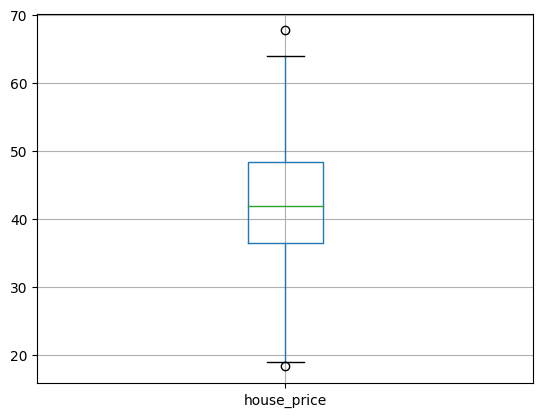

In [25]:
df_final_outliers.boxplot(column=['house_price'])

<Axes: >

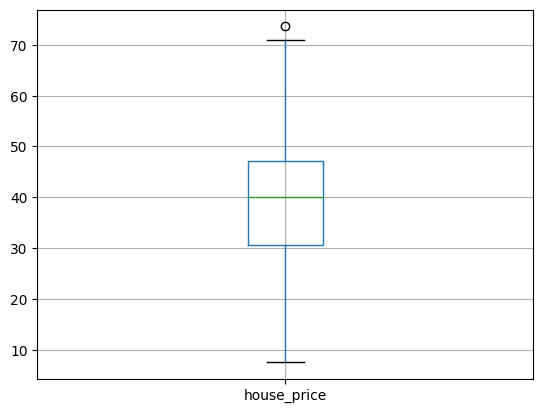

In [26]:
df_outliers_remove.boxplot(column=['house_price'])

# Cek Linearitas
Melakukan cek linearitas menggunakan **scatterplot** dan **pairplot** terhadap data yang **belum dihapus outliers** dan data yang **telah dihapus outliers**.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


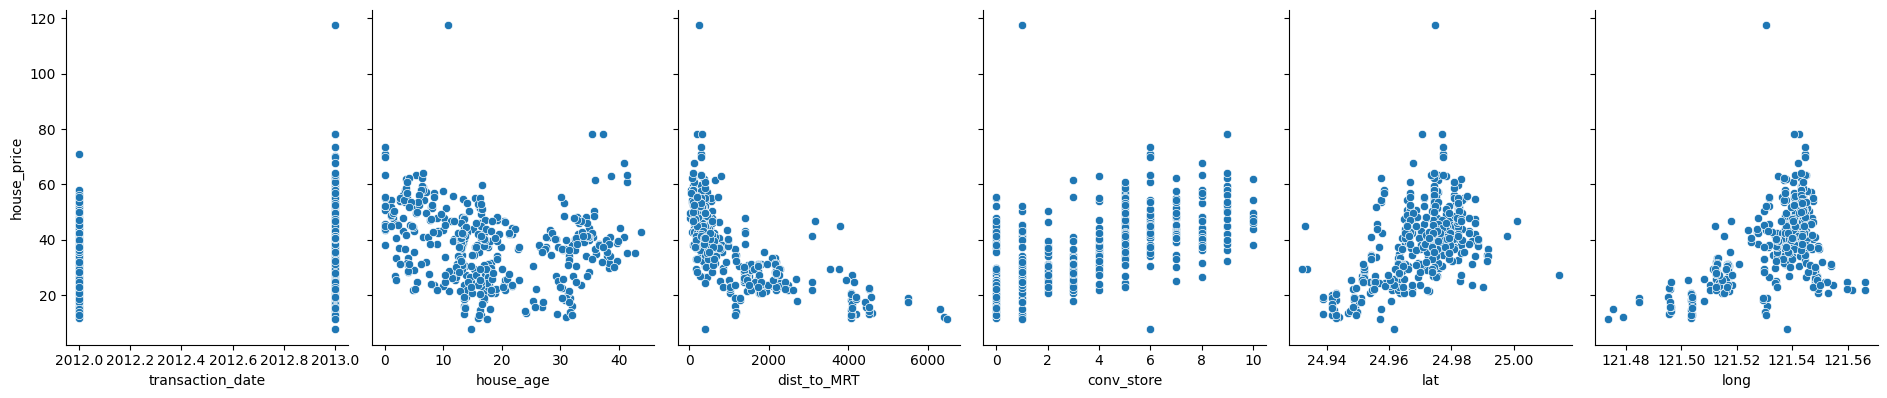

In [27]:
# Data yang belum dihapus outliersnya
sns.pairplot(df, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store', 'lat', 'long'], y_vars='house_price', height=4, aspect=0.8)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


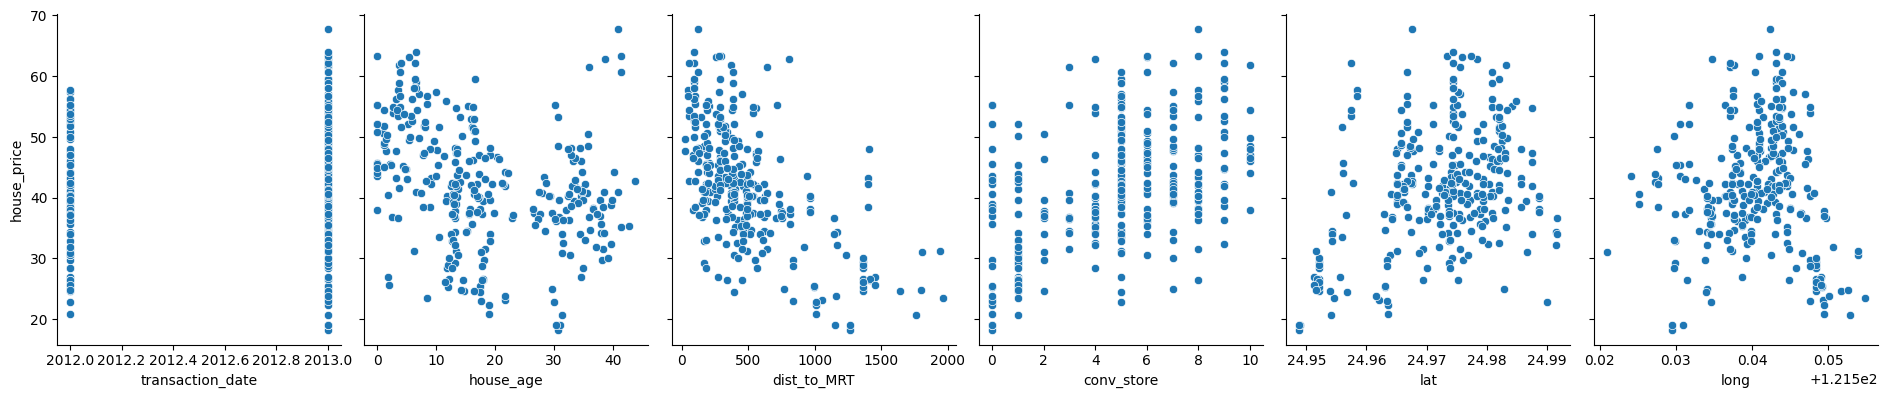

In [28]:
# Data yang telah dihapus outliers
sns.pairplot(df_final_outliers, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store', 'lat', 'long'], y_vars='house_price', height=4, aspect=0.8)

# Cek korelasi antar feature
Korelasi sendiri berguna untuk melihat apakah feature pada dataset memiliki tingkat hubungan yang tinggi/tidak. Mengapa harus melakukan cek korelasi? Karna, dengan korelasi kita dapat mengetahui feature mana yang akan kita gunakan dalam model, guna memberikan hasil akurasi yang optimal dan tingkat error yang sangat kecil. 

Disini, kita akan menggunakan korelasi dengan membandingkan antara data **yang belum di hapus outliers** dengan data **yang telah dihapus outliers**.

<Axes: >

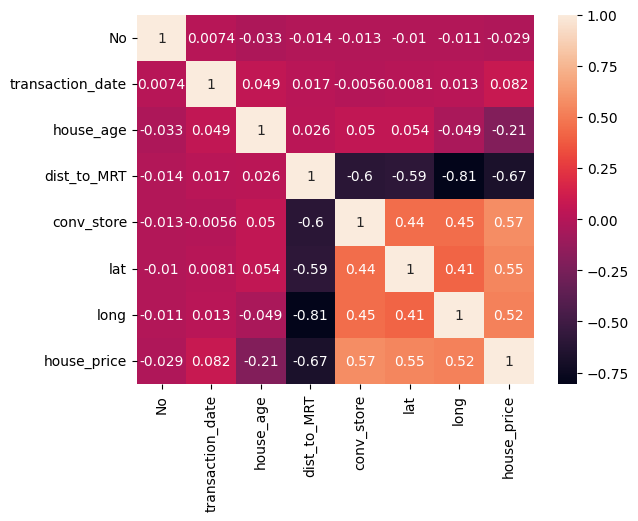

In [29]:
# Data yang belum dihapus outliers
sns.heatmap(df.corr(), annot=True)

<Axes: >

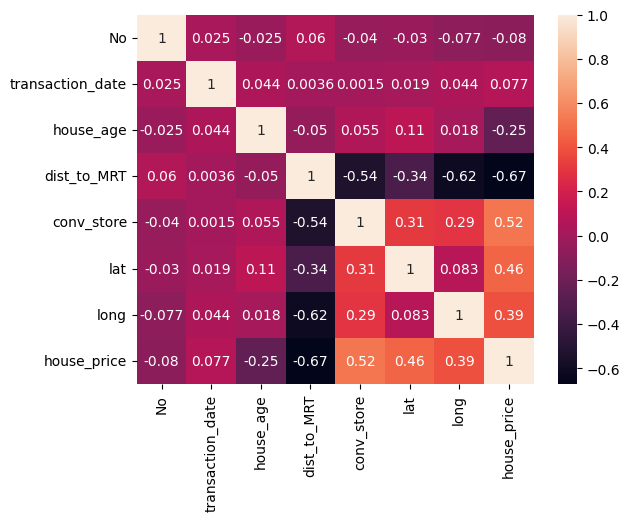

In [30]:
sns.heatmap(df_outliers_remove.corr(), annot=True)

<Axes: >

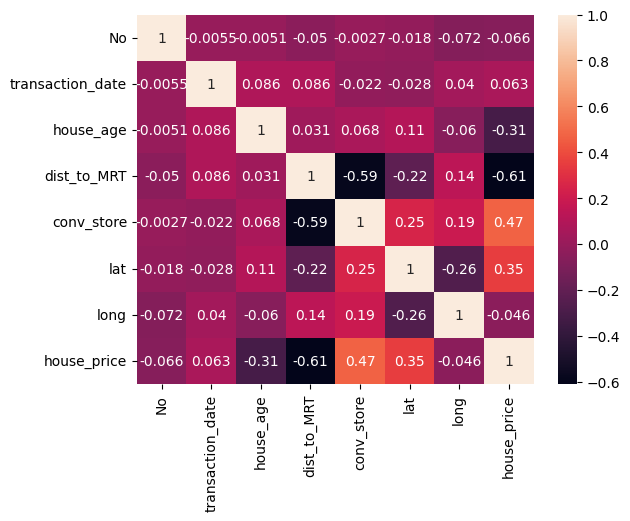

In [31]:
# Data yang telah dihapus outliers
sns.heatmap(df_final_outliers.corr(), annot=True)

# Transformasi data 
Disini kita akan melakukan transformasi data terhadap kolom 'dist_to_MRT'.

Alasan mengapa harus melakukan transformasi data adalah agar data yang awalnya menjauhi bentuk dari distribusi normal apabila ditransformasi, maka data tersebut akan memiliki bentuk yang lebih normal atau mendekati bentuk dari distribusi normal

<Axes: >

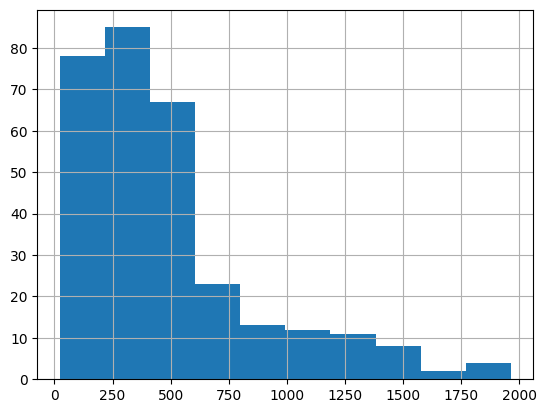

In [32]:
# Melakukan pengecekan distribusi pada kolom 'dist_to_MRT'
fig = df_final_outliers['dist_to_MRT'].hist()
fig

In [33]:
# Transformasi pada kolom 'dist_to_MRT'
df_final_outliers['dist_to_MRT_transform'] = np.log(df_final_outliers.dist_to_MRT)

/tmp/ipykernel_33/832521731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_outliers['dist_to_MRT_transform'] = np.log(df_final_outliers.dist_to_MRT)


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


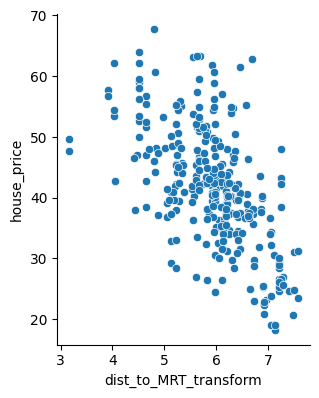

In [34]:
# Scatterplot/Pairplot antara 'house_price' dan 'dist_to_MRT_transform'
sns.pairplot(df_final_outliers, x_vars=['dist_to_MRT_transform'], y_vars='house_price', height=4, aspect=0.8)

# Linear Regression
Pada bagian ini, kita akan memberikan perbedaan/perbandingan antara data **yang belum di transformasi** dengan data **yang telah ditransformasi**.

In [35]:
# Data yang belum ditransformasi
X = df.drop(['No', 'house_price'], axis=1) # data fitur/prediktor
y = df.house_price # Target

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cek linearitas
reg = LinearRegression()
reg.fit(X_train, y_train)
print(f'\n{reg.coef_}')

# Prediction
y_pred = reg.predict(X_test)
print(f'\n{y_pred}')

# Gunakan R2-score untuk melihat variasi dari data
print('\nR2-SCORE : ', r2_score(y_test,y_pred))


[ 2.68705389e+00 -2.66936871e-01 -4.33085173e-03  1.12694349e+00
  2.33077479e+02 -1.02057128e+01]

[39.63687779 12.95384011 41.81305728 12.76367514 41.29924189 40.90129255
 40.6985449  34.74824611 48.84024094 45.29893402 46.09235472 41.62164085
 39.03426272 41.03122726 46.82107983 36.62528015 40.70874116 40.63906324
 40.03021131 41.62016789 50.30782595 31.54922966 39.06966549 46.64050981
 45.46231729 42.66064924 45.81119477 26.71673471 48.4487891  21.15554473
 43.69369023 33.697906   42.25607411 36.8308554  43.25760931 31.49584229
 48.40767661 39.79080215 52.06601578  7.84405937 52.07779081 32.22239074
 33.99333193 48.70550782 15.38993558 43.52752817 42.60467378 13.26481044
 33.5199633  47.43971563 52.78133035 39.29130088 47.12546689 25.39504882
 31.57592335 33.78477099 49.23498511 41.25474285 43.51207558 33.80468075
 42.94959921 43.01002506 40.5560045  46.31334917 37.19275401 30.82819562
 10.46495509 33.57620034 46.73478703 40.90129255 30.08934017 45.86850995
 44.80427438 30.4353778

In [36]:
# Data yang telah ditransformasi
X = df_final_outliers.drop(['No', 'house_price', 'dist_to_MRT'], axis=1) # data fitur/prediktor
y = df_final_outliers.house_price # Target

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cek linearitas
reg = LinearRegression()
reg.fit(X_train, y_train)
print(f'\n{reg.coef_}')

# Prediction
y_pred = reg.predict(X_test)
print(f'\n{y_pred}')

# Gunakan R2-score untuk melihat variasi dari data
print('\nR2-SCORE : ', r2_score(y_test,y_pred))


[ 3.94775957e+00 -2.32975523e-01  2.56656273e-01  3.57580183e+02
  7.20702977e+01 -6.30163701e+00]

[35.57366301 45.22801985 48.98939901 48.0963182  36.27127802 47.77399131
 41.52776959 43.7291411  50.20842502 37.03401663 45.62525562 47.23042905
 39.50245493 39.25491048 48.82778919 44.66413748 41.90636177 49.5730152
 34.34583866 43.12304965 46.31610947 35.20848403 49.03599411 50.14318616
 48.83708256 49.62704423 48.63590783 43.08618229 47.28908442 28.79654623
 38.07088713 45.62525562 37.46546536 56.91514616 41.55409048 37.60558316
 46.83954884 36.26859726 49.57183782 39.64968601 35.02569456 43.53875735
 49.32043362 48.61189706 41.69014632 40.98466815 28.86643889 47.99395253
 36.20571874 37.79608935 33.28309223 28.79889718 51.03197112 44.11067757
 51.55866802 47.81149906 45.85395117 56.86855105 48.64452123 39.81674515
 43.01172578]

R2-SCORE :  0.6050794321296779
